In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression


In [2]:
files=pd.read_csv('c://2G CSSR.csv',skiprows=6)

In [3]:
files.head()

,Time,GBSC,Cell CI,Cell Name,CellIndex,Site Name,Integrity,CS CSSR (with SDCCH blocks)(%),K3001:Failed SDCCH Seizures due to Busy SDCCH,K3000:SDCCH Seizure Requests,...,SDCCH Seizures Failures [%](%),CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel),CM364:Call Drops due to Equipment Failure (Signaling Channel),CM362:Call Drops Due to No MR from MS for a Long Time (Signaling Channe),CM361:Call Drops on Radio Interface in Handover State (Signaling Channel),CM365:Call Drops due to Forced Handover (Signaling Channel),CM369:Clear Requests Sent on the A interface (TCH) (Signaling Channel),CM36C:Call Drops on Radio Interface (Signaling Channel),SDCCH Congestion Time [s](s),TCH Congestion Time [s](s)
0,2017-07-22 00:00,B02BRU10,5148.0,B020-BXL_CONSEIL_EUROPEEN1,1021.0,B020-BXL_CONSEIL_EUROPEEN,100%,NaN,0.0,8.0,...,25.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-07-22 00:00,B02BRU10,5183.0,F020-A4_OVERIJSE3,1241.0,F020-A4_OVERIJSE,100%,100.0000,0.0,123.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-07-22 00:00,B02BRU10,28734.0,F112-KRA_RING_KRAAINEM2,1287.0,F112-KRA_RING_KRAAINEM,100%,100.0000,0.0,118.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-07-22 00:00,B02BRU10,10238.0,B345-IXL_PLACE_ALBERT_II1,1609.0,B345-IXL_PLACE_ALBERT_II,100%,99.7831,0.0,463.0,...,0.432,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2017-07-22 00:00,B04LIE10,44701.0,L429-CHEVRON1,161.0,L429-CHEVRON,100%,100.0000,0.0,66.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
files.columns

Index(['Time', 'GBSC', 'Cell CI', 'Cell Name', 'CellIndex', 'Site Name',
       'Integrity', 'CS CSSR (with SDCCH blocks)(%)',
       'K3001:Failed SDCCH Seizures due to Busy SDCCH',
       'K3000:SDCCH Seizure Requests', 'CM36:Call Drops on Signaling Channel',
       'CA303J:Call Setup Indications (Circuit Service)',
       'K3013A:Successful TCH Seizures (Traffic Channel)',
       'K3010A:TCH Seizure Requests (Traffic Channel)',
       'A3129H:Failed Assignments (Clear Commands Sent By MSC)',
       'CA300J:Channel Requests (Circuit Service)',
       'R3120A:Channel Assignment Failures (All Channels Busy or Channels Unconfigured) in Immediate Assignment Procedure (SDCCH)',
       'SDCCH Blocking [%](%)', 'SDCCH Blocks', 'SDCCH Drop Call Rate [%](%)',
       'SDCCH Drops', 'SDCCH Seizures Successful', 'SDCCH Non Radio Drops',
       'SDCCH Radio Drops', 'SDCCH Seizures Failures [%](%)',
       'CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel)',
       'CM364:C

In [5]:
files.shape

(2400001, 34)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0DAFD5B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C080BEC198>]], dtype=object)

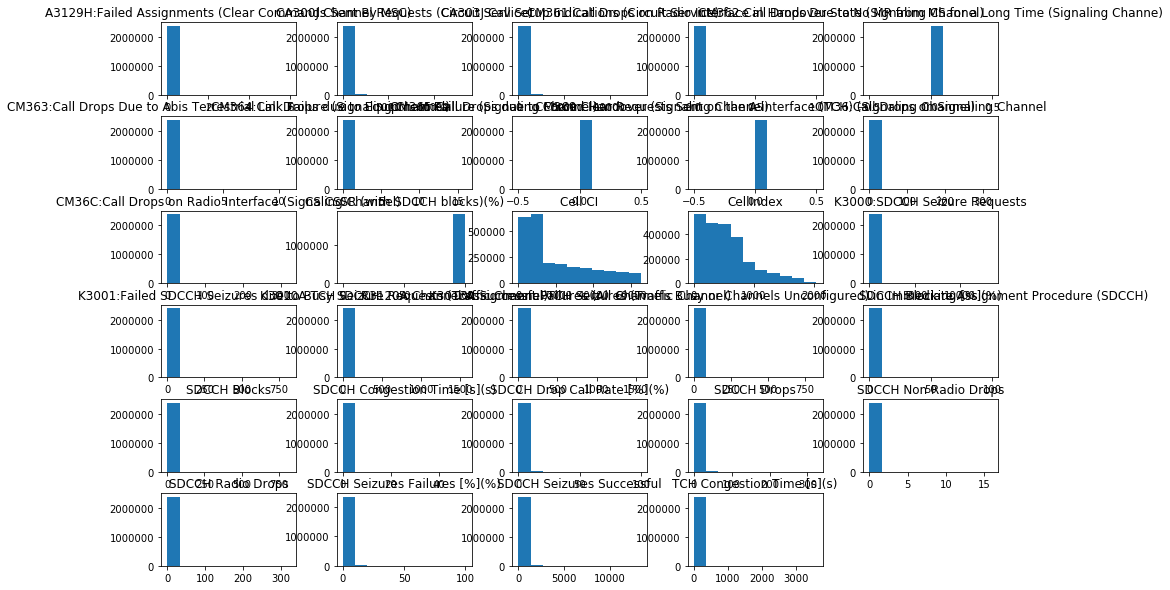

In [6]:
files.hist(bins=10,figsize=(15,10),grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C080D0D828>]], dtype=object)

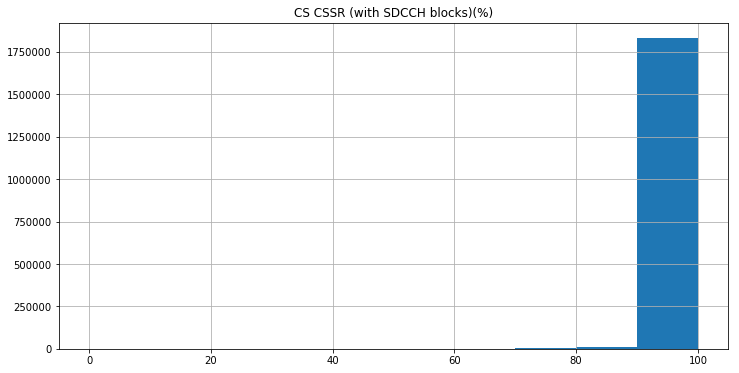

In [7]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices1 = pd.DataFrame({"CS CSSR (with SDCCH blocks)(%)":files["CS CSSR (with SDCCH blocks)(%)"]})
#prices2 = pd.DataFrame({"price":files["GBSC"]})
prices3 = pd.DataFrame({"Cell CI":files["Cell CI"]})
prices4 = pd.DataFrame({"CellIndex":files["CellIndex"]})
#prices5 = pd.DataFrame({"price":files["Site Name"]})
prices6 = pd.DataFrame({"K3000:SDCCH Seizure Requests":files["K3000:SDCCH Seizure Requests"]})
prices7 = pd.DataFrame({"SDCCH Seizures Failures [%](%)":files["SDCCH Seizures Failures [%](%)"]})
prices8 = pd.DataFrame({"SDCCH Drop Call Rate [%](%)":files["SDCCH Drop Call Rate [%](%)"]})
prices9 = pd.DataFrame({"SDCCH Blocking [%](%)":files["SDCCH Blocking [%](%)"]})
prices10 = pd.DataFrame({"SDCCH Blocks":files["SDCCH Blocks"]})
prices11 = pd.DataFrame({"SDCCH Drops":files["SDCCH Drops"]})
prices12 = pd.DataFrame({"SDCCH Seizures Successful":files["SDCCH Seizures Successful"]})
prices13 = pd.DataFrame({"A3129H:Failed Assignments (Clear Commands Sent By MSC)":files["A3129H:Failed Assignments (Clear Commands Sent By MSC)"]})
prices1.hist()

In [8]:
#prices2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C081463940>]], dtype=object)

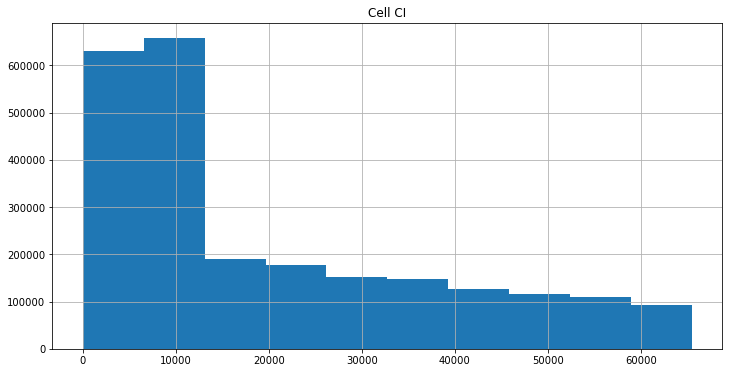

In [9]:
prices3.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C08110DF98>]], dtype=object)

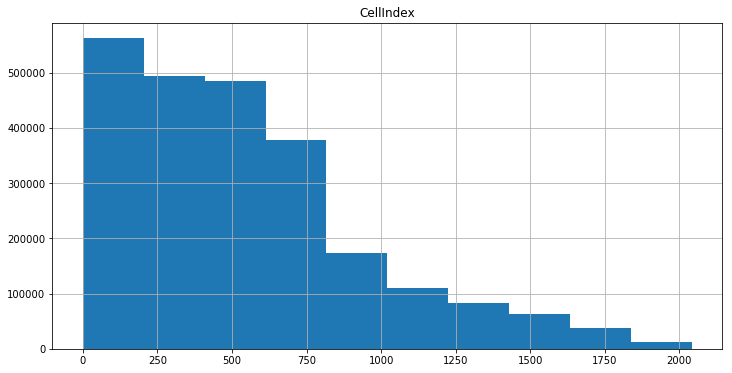

In [10]:
prices4.hist()

In [11]:
#prices5.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C08113FDD8>]], dtype=object)

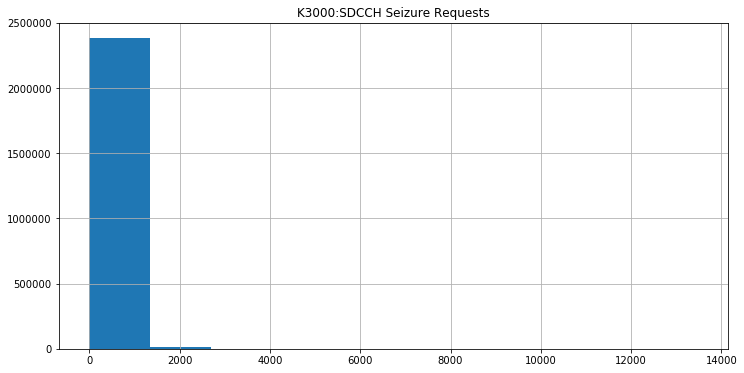

In [12]:
prices6.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0811DD780>]], dtype=object)

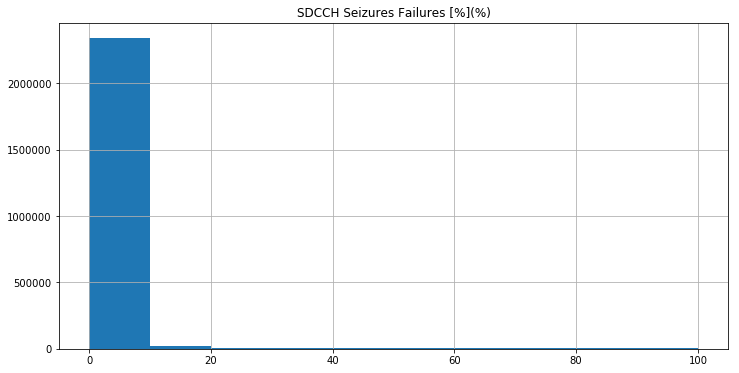

In [13]:
prices7.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0819D9B00>]], dtype=object)

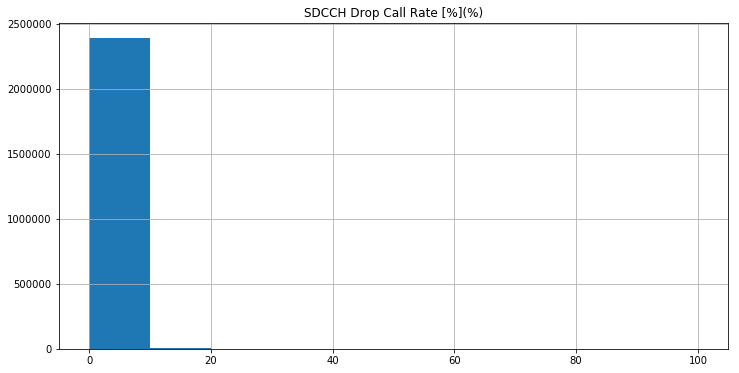

In [14]:
prices8.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C081B57588>]], dtype=object)

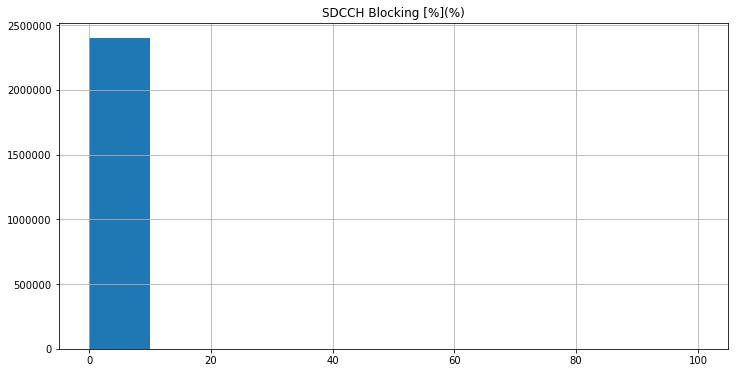

In [15]:
prices9.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C081BEB550>]], dtype=object)

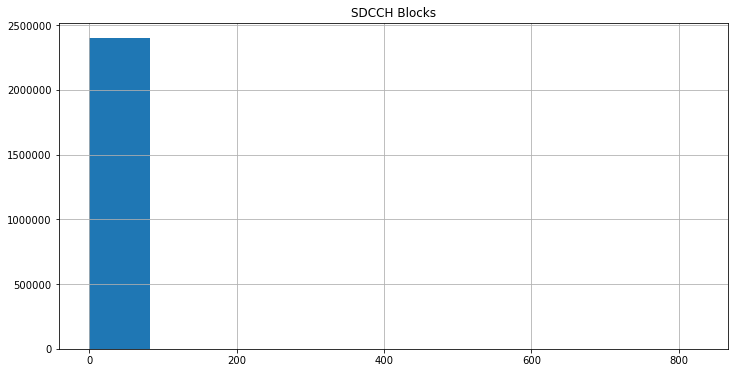

In [16]:
prices10.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C081C7ADA0>]], dtype=object)

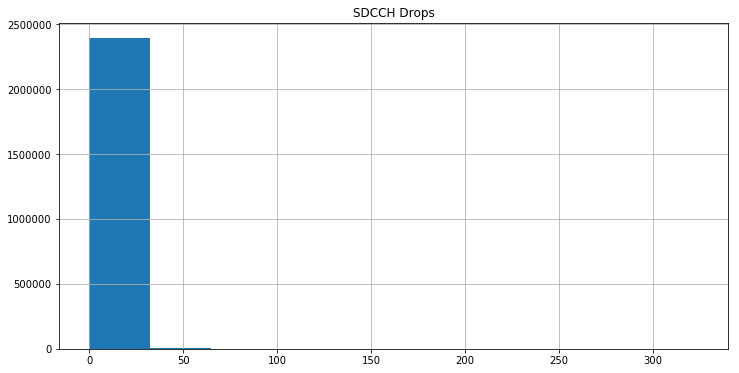

In [17]:
prices11.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0823009E8>]], dtype=object)

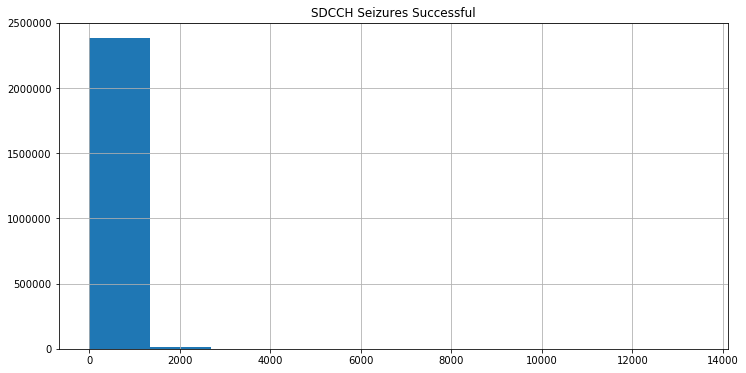

In [18]:
prices12.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C081FCBA58>]], dtype=object)

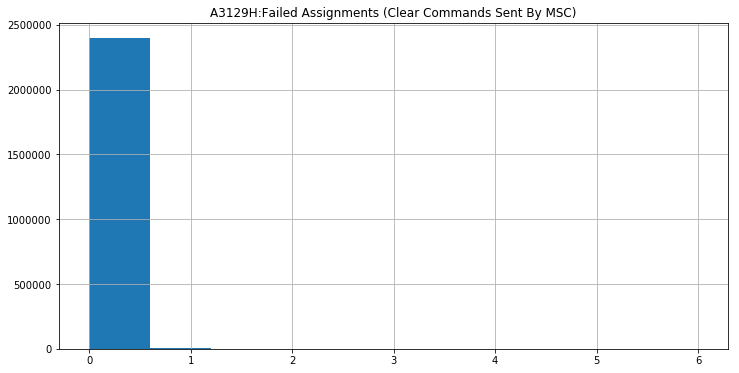

In [19]:
prices13.hist()

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(files, test_size=0.2)
predictors=[ 
         'Cell CI',  'CellIndex', 
        
       'K3001:Failed SDCCH Seizures due to Busy SDCCH',
       'K3000:SDCCH Seizure Requests', 'CM36:Call Drops on Signaling Channel',
       'CA303J:Call Setup Indications (Circuit Service)',
       'K3013A:Successful TCH Seizures (Traffic Channel)',
       'K3010A:TCH Seizure Requests (Traffic Channel)',
       'A3129H:Failed Assignments (Clear Commands Sent By MSC)',
       'CA300J:Channel Requests (Circuit Service)',
       'R3120A:Channel Assignment Failures (All Channels Busy or Channels Unconfigured) in Immediate Assignment Procedure (SDCCH)',
       'SDCCH Blocking [%](%)', 'SDCCH Blocks', 'SDCCH Drop Call Rate [%](%)',
       'SDCCH Drops', 'SDCCH Seizures Successful', 'SDCCH Non Radio Drops',
       'SDCCH Radio Drops', 'SDCCH Seizures Failures [%](%)',
       'CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel)',
       'CM364:Call Drops due to Equipment Failure (Signaling Channel)',
       'CM362:Call Drops Due to No MR from MS for a Long Time (Signaling Channe)',
       'CM361:Call Drops on Radio Interface in Handover State (Signaling Channel)',
       'CM365:Call Drops due to Forced Handover (Signaling Channel)',
       'CM369:Clear Requests Sent on the A interface (TCH) (Signaling Channel)',
       'CM36C:Call Drops on Radio Interface (Signaling Channel)',
       'SDCCH Congestion Time [s](s)', 'TCH Congestion Time [s](s)']

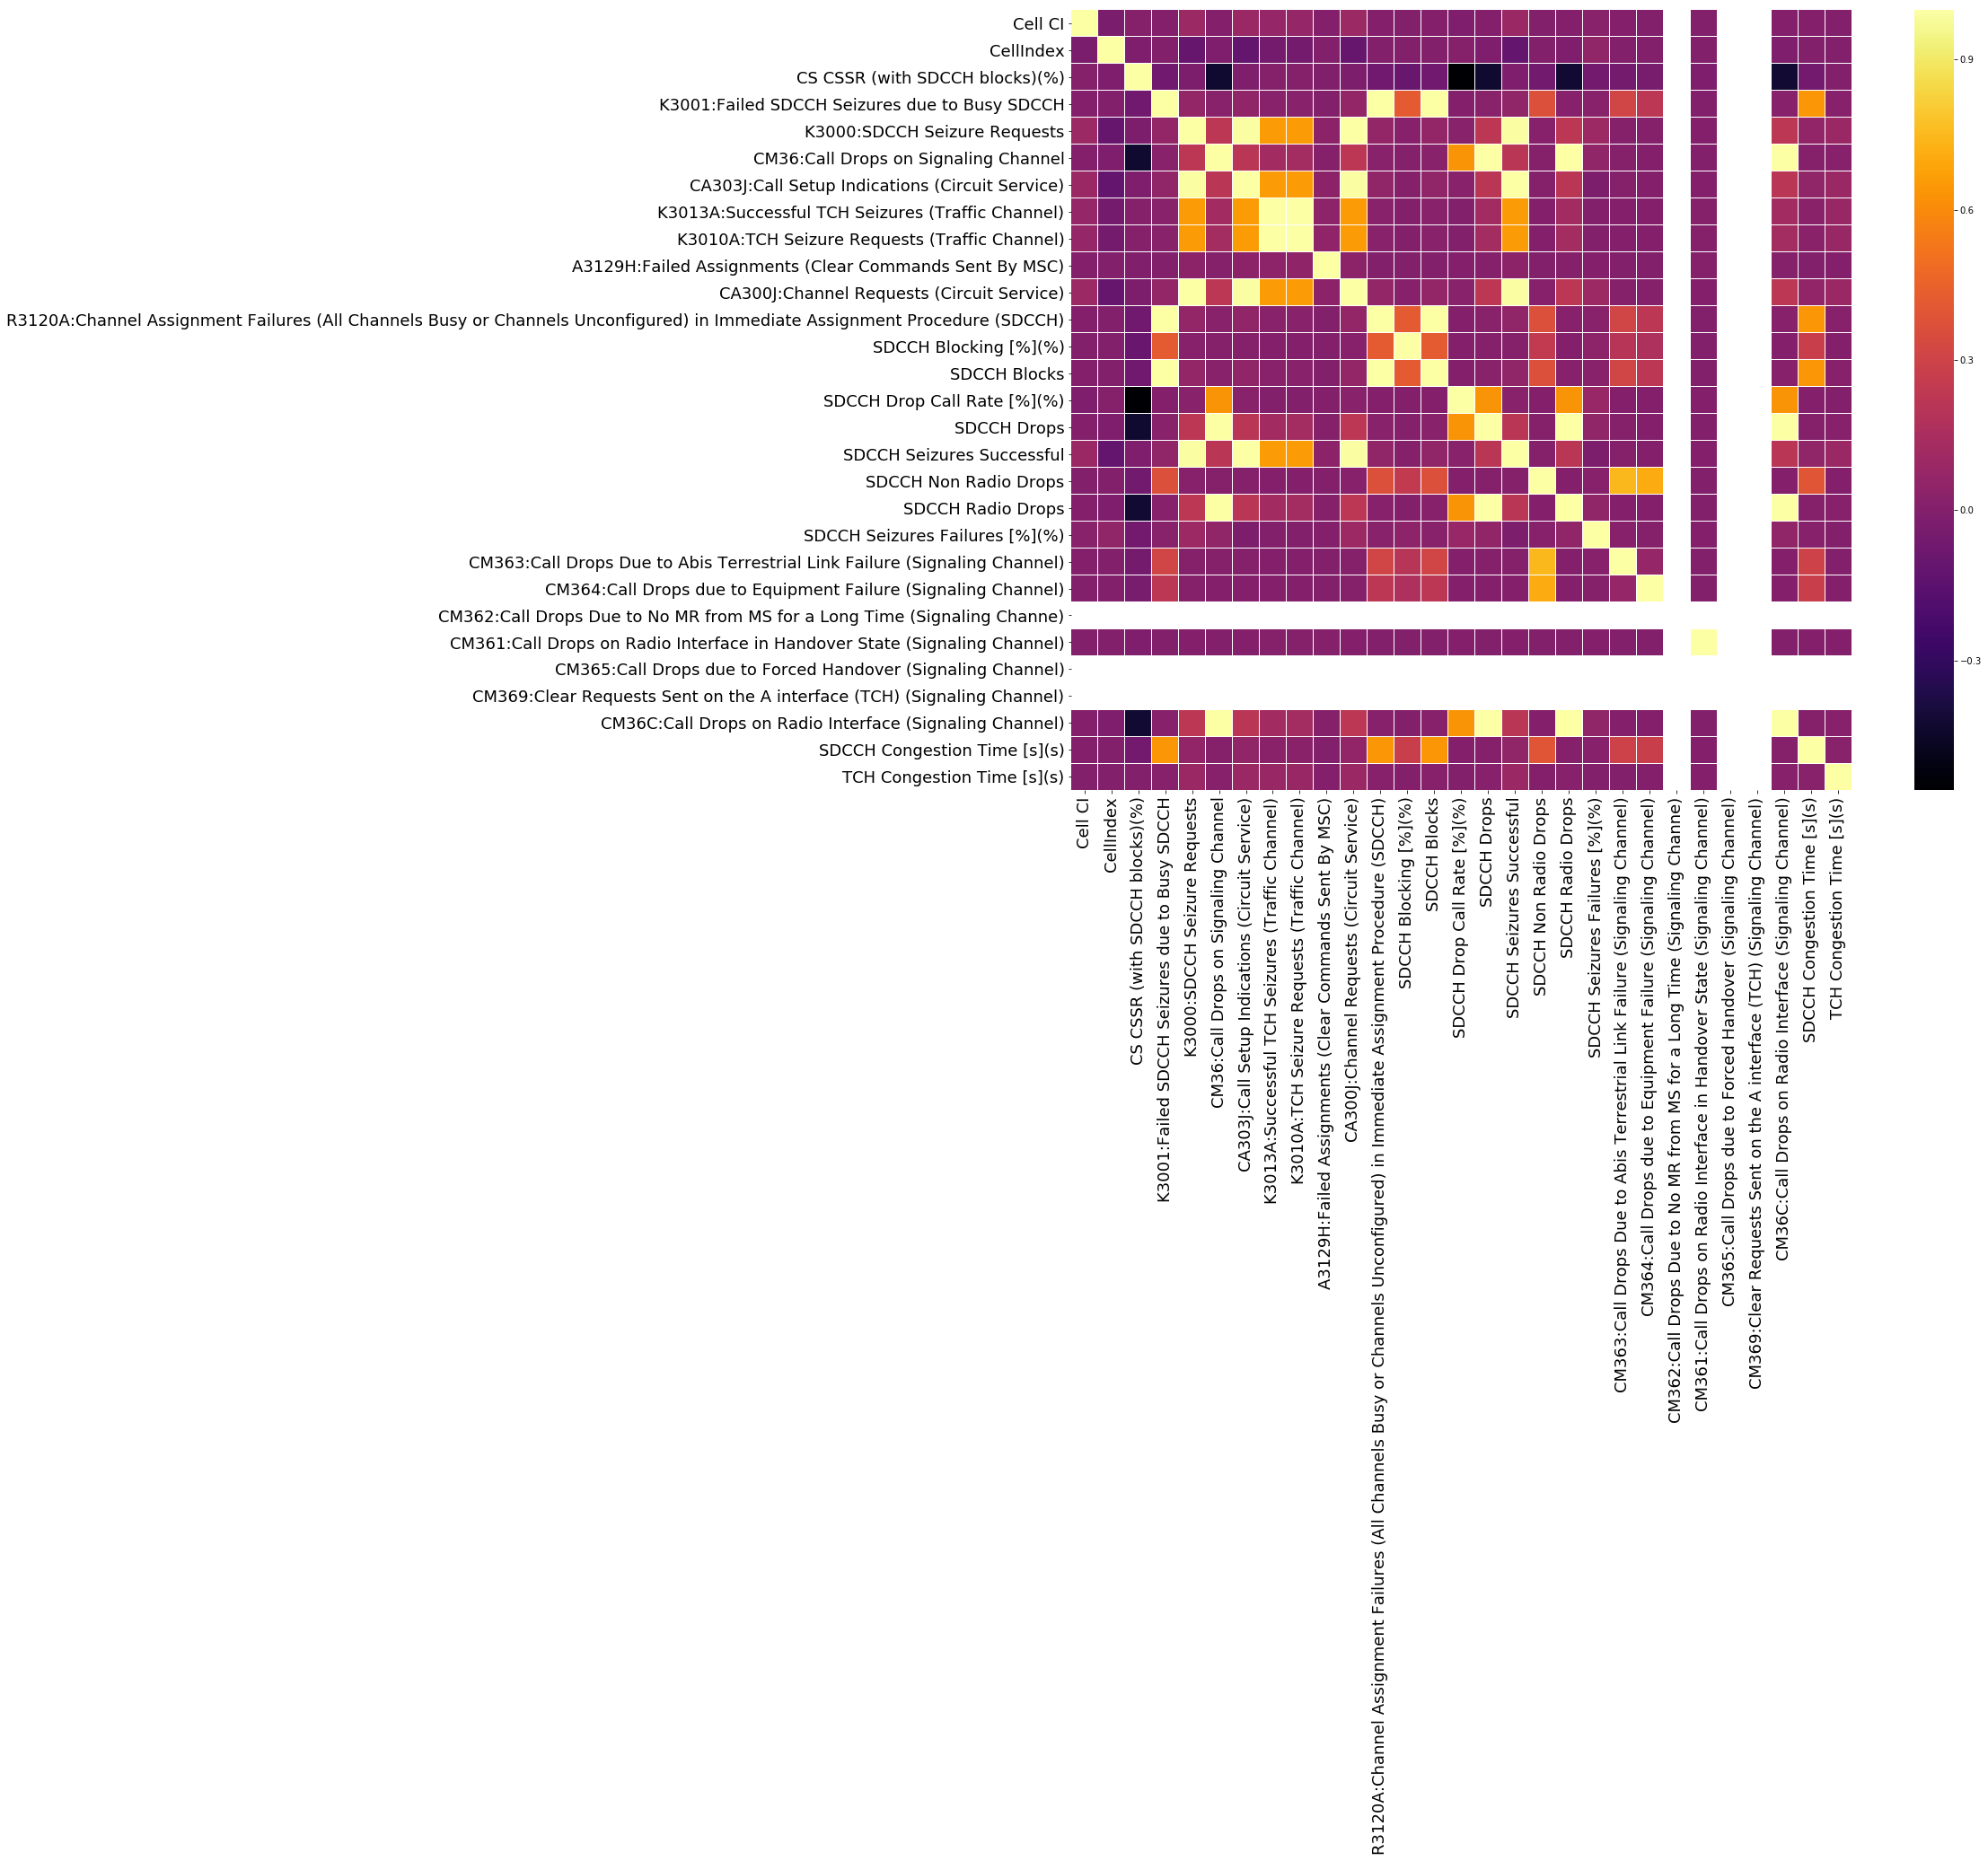

In [27]:
import matplotlib.pyplot as plt
corr=train.corr()
f,ax= plt.subplots(figsize=(25,16))
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

sns.heatmap(corr,cmap='inferno',linewidths=0.1,vmax=1.0,square=True,annot=False)

In [28]:
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'CS CSSR (with SDCCH blocks)(%)')['CS CSSR (with SDCCH blocks)(%)'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
train["CS CSSR (with SDCCH blocks)(%)"].median()

In [ ]:
train["CS CSSR (with SDCCH blocks)(%)"].replace('%',' ')
train["CS CSSR (with SDCCH blocks)(%)"]=train["CS CSSR (with SDCCH blocks)(%)"].fillna(value=train["CS CSSR (with SDCCH blocks)(%)"].median())

In [ ]:
train.columns[train.isnull().any()].tolist()

In [ ]:
train["Cell CI"]=train["Cell CI"].fillna(value=train["Cell CI"].median())
train["CellIndex"]=train["CellIndex"].fillna(value=train["CellIndex"].median())
#train["Integrity"]=train["Integrity"].fillna(value=train["Integrity"].median())
train["TCH Congestion Time [s](s)"]=train["TCH Congestion Time [s](s)"].fillna(value=train["TCH Congestion Time [s](s)"].median())
train["SDCCH Congestion Time [s](s)"]=train["SDCCH Congestion Time [s](s)"].fillna(value=train["SDCCH Congestion Time [s](s)"].median())
train["CM36C:Call Drops on Radio Interface (Signaling Channel)"]=train["CM36C:Call Drops on Radio Interface (Signaling Channel)"].fillna(value=train["CM36C:Call Drops on Radio Interface (Signaling Channel)"].median())
train["CM369:Clear Requests Sent on the A interface (TCH) (Signaling Channel)"]=train["CM369:Clear Requests Sent on the A interface (TCH) (Signaling Channel)"].fillna(value=train["CM369:Clear Requests Sent on the A interface (TCH) (Signaling Channel)"].median())
train["CM365:Call Drops due to Forced Handover (Signaling Channel)"]=train["CM365:Call Drops due to Forced Handover (Signaling Channel)"].fillna(value=train["CM365:Call Drops due to Forced Handover (Signaling Channel)"].median())
train["CM361:Call Drops on Radio Interface in Handover State (Signaling Channel)"]=train["CM361:Call Drops on Radio Interface in Handover State (Signaling Channel)"].fillna(value=train["CM361:Call Drops on Radio Interface in Handover State (Signaling Channel)"].median())
train["CM362:Call Drops Due to No MR from MS for a Long Time (Signaling Channe)"]=train["CM362:Call Drops Due to No MR from MS for a Long Time (Signaling Channe)"].fillna(value=train["CM362:Call Drops Due to No MR from MS for a Long Time (Signaling Channe)"].median())
train["CM364:Call Drops due to Equipment Failure (Signaling Channel)"]=train["CM364:Call Drops due to Equipment Failure (Signaling Channel)"].fillna(value=train["CM364:Call Drops due to Equipment Failure (Signaling Channel)"].median())
train["CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel)"]=train["CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel)"].fillna(value=train["CM363:Call Drops Due to Abis Terrestrial Link Failure (Signaling Channel)"].median())
train["SDCCH Seizures Failures [%](%)"]=train["SDCCH Seizures Failures [%](%)"].fillna(value=train["SDCCH Seizures Failures [%](%)"].median())
train["SDCCH Radio Drops"]=train["SDCCH Radio Drops"].fillna(value=train["SDCCH Radio Drops"].median())
train["SDCCH Non Radio Drops"]=train["SDCCH Non Radio Drops"].fillna(value=train["SDCCH Non Radio Drops"].median())
train["SDCCH Seizures Successful"]=train["SDCCH Seizures Successful"].fillna(value=train["SDCCH Seizures Successful"].median())
train["SDCCH Drops"]=train["SDCCH Drops"].fillna(value=train["SDCCH Drops"].median())
train["SDCCH Drop Call Rate [%](%)"]=train["SDCCH Drop Call Rate [%](%)"].fillna(value=train["SDCCH Drop Call Rate [%](%)"].median())
train["SDCCH Blocks"]=train["SDCCH Blocks"].fillna(value=train["SDCCH Blocks"].median())
train["SDCCH Blocking [%](%)"]=train["SDCCH Blocking [%](%)"].fillna(value=train["SDCCH Blocking [%](%)"].median())
train["R3120A:Channel Assignment Failures (All Channels Busy or Channels Unconfigured) in Immediate Assignment Procedure (SDCCH)"]=train["R3120A:Channel Assignment Failures (All Channels Busy or Channels Unconfigured) in Immediate Assignment Procedure (SDCCH)"].fillna(value=train["R3120A:Channel Assignment Failures (All Channels Busy or Channels Unconfigured) in Immediate Assignment Procedure (SDCCH)"].median())
train["CA300J:Channel Requests (Circuit Service)"]=train["CA300J:Channel Requests (Circuit Service)"].fillna(value=train["CA300J:Channel Requests (Circuit Service)"].median())
train["A3129H:Failed Assignments (Clear Commands Sent By MSC)"]=train["A3129H:Failed Assignments (Clear Commands Sent By MSC)"].fillna(value=train["A3129H:Failed Assignments (Clear Commands Sent By MSC)"].median())
train["K3010A:TCH Seizure Requests (Traffic Channel)"]=train["K3010A:TCH Seizure Requests (Traffic Channel)"].fillna(value=train["K3010A:TCH Seizure Requests (Traffic Channel)"].median())
train["K3013A:Successful TCH Seizures (Traffic Channel)"]=train["K3013A:Successful TCH Seizures (Traffic Channel)"].fillna(value=train["K3013A:Successful TCH Seizures (Traffic Channel)"].median())
train["CA303J:Call Setup Indications (Circuit Service)"]=train["CA303J:Call Setup Indications (Circuit Service)"].fillna(value=train["CA303J:Call Setup Indications (Circuit Service)"].median())
train["CM36:Call Drops on Signaling Channel"]=train["CM36:Call Drops on Signaling Channel"].fillna(value=train["CM36:Call Drops on Signaling Channel"].median())
train["K3000:SDCCH Seizure Requests"]=train["K3000:SDCCH Seizure Requests"].fillna(value=train["K3000:SDCCH Seizure Requests"].median())
train["K3001:Failed SDCCH Seizures due to Busy SDCCH"]=train["K3001:Failed SDCCH Seizures due to Busy SDCCH"].fillna(value=train["K3001:Failed SDCCH Seizures due to Busy SDCCH"].median())

In [ ]:
train["CS CSSR (with SDCCH blocks)(%)"].dtypes
train["CS CSSR (with SDCCH blocks)(%)"].convert_objects(convert_numeric=True)

In [ ]:
dataset = np.asarray(train["CS CSSR (with SDCCH blocks)(%)"], dtype="|S6")
lgr=LogisticRegression(random_state=1)
lgr.fit(train[predictors], dataset)
prediction= lgr.predict(test[predictors]) 
scores = cross_validation.cross_val_score(lgr, train[predictors], train["CS CSSR (with SDCCH blocks)(%)"], cv=3)
print(scores.mean())

In [28]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
dataset = np.asarray(train["CS CSSR (with SDCCH blocks)(%)"], dtype="|S6")
rfc= RandomForestClassifier(random_state=1, n_estimators = 50, min_samples_split=4, min_samples_leaf=2)
kfr= cross_validation.KFold(train.shape[0], random_state=1, n_folds = 3)
scores= cross_validation.cross_val_score(rfc, train[predictors], dataset"], cv=kfr)
print (scores.mean())

SyntaxError: EOL while scanning string literal (<ipython-input-28-b80b044486e3>, line 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
clf_knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance'
    )
clf_knn = clf_knn.fit(titanic[predictors],titanic["'CS CSSR (with SDCCH blocks)(%)'"])
score_knn = cross_val_score(clf_knn,titanic[predictors],titanic["'CS CSSR (with SDCCH blocks)(%)'"], cv=5).mean()
print(score_knn)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
predictors= ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 1.0, max_depth=1)
clf.fit(titanic[predictors],titanic["'CS CSSR (with SDCCH blocks)(%)'"])
score = cross_val_score(clf,titanic[predictors],titanic["'CS CSSR (with SDCCH blocks)(%)'"],cv=5).mean()
print (score)

In [ ]:
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(train_df_munged, label_df)

# Run prediction on training set to get a rough idea of how well it does.
y_pred = regr.predict(train_df_munged)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))

# Run prediction on the Kaggle test set.
y_pred_xgb = regr.predict(test_df_munged)